In [1]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.2 MB/s 


In [2]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import  _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from tensorflow.keras.utils import get_source_inputs

In [3]:
def VGGupdated(input_tensor=None,classes=9):
   

    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3 # This mean we are working we are working on coloured image

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    #64 filters with 3*3 filters relu here will replace all the negative value to positive
    #Same simply means no padding 
    x = Conv2D(64, (3, 3), activation='leaky_relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='leaky_relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    #After first layer 64 filtered images are being passed

    # Block 2
    x = Conv2D(128, (3, 3), activation='leaky_relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='leaky_relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='leaky_relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='leaky_relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='leaky_relu', padding='same', name='block3_conv3')(x)
    x = Conv2D(256, (3, 3), activation='leaky_relu', padding='same', name='block3_conv4')(x)

    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='leaky_relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='leaky_relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='leaky_relu', padding='same', name='block4_conv3')(x)
    x = Conv2D(256, (3, 3), activation='leaky_relu', padding='same', name='block4_conv4')(x)

    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='leaky_relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='leaky_relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='leaky_relu', padding='same', name='block5_conv3')(x)
    x = Conv2D(256, (3, 3), activation='leaky_relu', padding='same', name='block5_conv4')(x)

    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    #Now for classification we need to flatten the image 

    # Layers have 4096 neurons and the final layer is having number of classes neurons
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [4]:
model = VGGupdated(classes = 9)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/candle stick pattern 2')

candle_types = os.listdir('/content/drive/MyDrive/candle stick pattern 2')
print (candle_types)  #what kinds of candles are in this dataset

print("Types of rooms found: ", len(dataset_path))

['Bullish Harami', 'Hanging man', 'Inverted Hammer', 'White solder', 'Bearish Engulfing', 'Evening star', 'Bullish Spinning Top', 'Hammer candle stick pattern', 'Bearish Harami']
Types of rooms found:  9


In [9]:
candles=[]

for item in candle_types:
 # Get all the file names
 all_candles = os.listdir('/content/drive/MyDrive/Candle stick pattern' + '/' +item)
 

 # Add them to the list
 for candle in all_candles:
    candles.append((item, str('/content/drive/MyDrive/Candle stick pattern' + '/' +item) + '/' + candle))
    print(candles)


[('Bullish Harami', '/content/drive/MyDrive/Candle stick pattern/Bullish Harami/Screenshot 2022-10-26 at 5.47.19 PM.jpg')]
[('Bullish Harami', '/content/drive/MyDrive/Candle stick pattern/Bullish Harami/Screenshot 2022-10-26 at 5.47.19 PM.jpg'), ('Bullish Harami', '/content/drive/MyDrive/Candle stick pattern/Bullish Harami/Screenshot 2022-10-26 at 5.42.26 PM copy.jpg')]
[('Bullish Harami', '/content/drive/MyDrive/Candle stick pattern/Bullish Harami/Screenshot 2022-10-26 at 5.47.19 PM.jpg'), ('Bullish Harami', '/content/drive/MyDrive/Candle stick pattern/Bullish Harami/Screenshot 2022-10-26 at 5.42.26 PM copy.jpg'), ('Bullish Harami', '/content/drive/MyDrive/Candle stick pattern/Bullish Harami/Screenshot 2022-10-26 at 5.44.53 PM.jpg')]
[('Bullish Harami', '/content/drive/MyDrive/Candle stick pattern/Bullish Harami/Screenshot 2022-10-26 at 5.47.19 PM.jpg'), ('Bullish Harami', '/content/drive/MyDrive/Candle stick pattern/Bullish Harami/Screenshot 2022-10-26 at 5.42.26 PM copy.jpg'), ('Bul

In [10]:
  
# Build a dataframe        
candles_df = pd.DataFrame(data=candles, columns=['Candle type', 'image'])
print(candles_df.head())
#print(rooms_df.tail())

      Candle type                                              image
0  Bullish Harami  /content/drive/MyDrive/Candle stick pattern/Bu...
1  Bullish Harami  /content/drive/MyDrive/Candle stick pattern/Bu...
2  Bullish Harami  /content/drive/MyDrive/Candle stick pattern/Bu...
3  Bullish Harami  /content/drive/MyDrive/Candle stick pattern/Bu...
4  Bullish Harami  /content/drive/MyDrive/Candle stick pattern/Bu...


In [11]:
# Let's check how many samples for each category are present
print("Total number of Candles in the dataset: ", len(candles_df))

candle_count = candles_df['Candle type'].value_counts()

print("Candles in each category: ")
print(candle_count)

Total number of Candles in the dataset:  180
Candles in each category: 
Bullish Harami                 20
Hanging man                    20
Inverted Hammer                20
White solder                   20
Bearish Engulfing              20
Evening star                   20
Bullish Spinning Top           20
Hammer candle stick pattern    20
Bearish Harami                 20
Name: Candle type, dtype: int64


In [12]:
import cv2
path = '/content/drive/MyDrive/Candle stick pattern/'


im_size = 300

images = []
labels = []

for i in candle_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        try:
          img = cv2.resize(img, (im_size, im_size))
        except Exception as e:
          print((e))
        # except:
        #   break

        
        images.append(img)
        labels.append(i)

In [13]:

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape   

(180, 300, 300, 3)

In [14]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=candles_df['Candle type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)
y.shape

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(180,)

In [15]:
import numpy as np
import numba as nb

In [16]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

y=candles_df['Candle type'].values
#print(y[:5])
y=y.reshape(-1,1)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y.dtype)
y=to_categorical(y)

# ct = ColumnTransformer([("Candles in each category", OneHotEncoder(), [0])], remainder = 'passthrough')

# Y = ct.fit_transform(y)


int64


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, y = shuffle(images, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=415)
# y_train=np.eye(nb)[y_train]
# y_test=np.eye(nb)[y_test]
#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(171, 300, 300, 3)
(171, 9)
(9, 300, 300, 3)
(9, 9)


In [18]:
model.fit(train_x, train_y, epochs = 25, batch_size = 32)  

Epoch 1/25
6/6 [==============================] - 32s 2s/step - loss: 7.0865 - accuracy: 0.0877
Epoch 2/25
6/6 [==============================] - 5s 825ms/step - loss: 1020.2866 - accuracy: 0.1111
Epoch 3/25
6/6 [==============================] - 5s 826ms/step - loss: 476.5846 - accuracy: 0.0994
Epoch 4/25
6/6 [==============================] - 5s 829ms/step - loss: 1628.0448 - accuracy: 0.1111
Epoch 5/25
6/6 [==============================] - 5s 840ms/step - loss: 7724.8687 - accuracy: 0.1170
Epoch 6/25
6/6 [==============================] - 5s 840ms/step - loss: 21525.1094 - accuracy: 0.0994
Epoch 7/25
6/6 [==============================] - 5s 846ms/step - loss: 129211.6719 - accuracy: 0.1111
Epoch 8/25
6/6 [==============================] - 5s 850ms/step - loss: 148697.5469 - accuracy: 0.1111
Epoch 9/25
6/6 [==============================] - 5s 858ms/step - loss: 139587.2344 - accuracy: 0.0819
Epoch 10/25
6/6 [==============================] - 5s 870ms/step - loss: 1009300.3750 - ac

In [19]:
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 590.2 MB 3.1 kB/s 
     |████████████████████████████████| 6.0 MB 36.0 MB/s 
     |████████████████████████████████| 1.7 MB 52.1 MB/s 
     |████████████████████████████████| 439 kB 71.7 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.10.26 which is incompatible.


In [20]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import tensorflow


In [21]:
import tensorflow
from tensorflow.keras.utils import load_img

In [22]:
from tensorflow.keras.utils import img_to_array
import numpy as np

In [23]:
#from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

Input image shape: (1, 300, 300, 3)


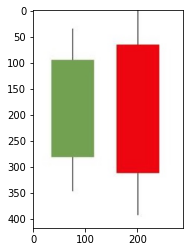

In [36]:
img_path = '/content/drive/MyDrive/Screenshot 2022-10-26 at 5.53.50 PM copy.jpg'

img = load_img(img_path, target_size=(300, 300))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [37]:
model.predict(x)

1/1 [==============================] - 0s 80ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

AttributeError: ignored

In [42]:
candles_df['Candle type'][105]

'Evening star'